In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

from skimage import measure
from skimage.draw import ellipsoid
import cactas as C
import nrrd

2024-08-22 03:40:30.758842: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/CA_CAS2/'

In [3]:
seg = C.Helper.load_seg_data(DATAPATH)

In [4]:
len(seg)

17

6.ca.seg.nrrd


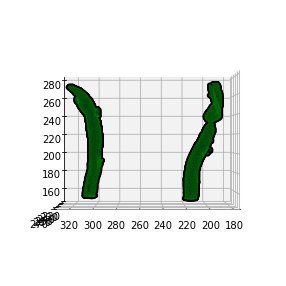

39.ca.seg.nrrd


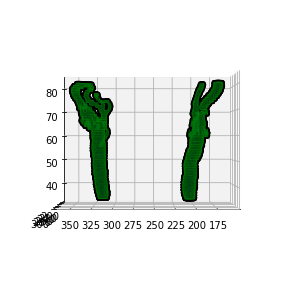

89.ca.seg.nrrd


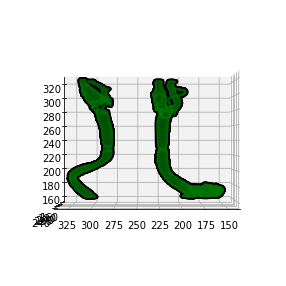

56.ca.seg.nrrd


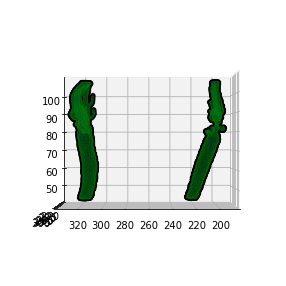

46.ca.seg.nrrd


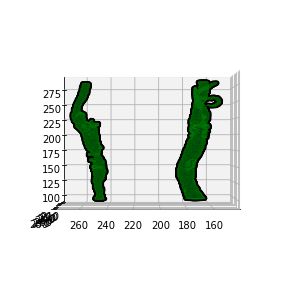

42.ca.seg.nrrd


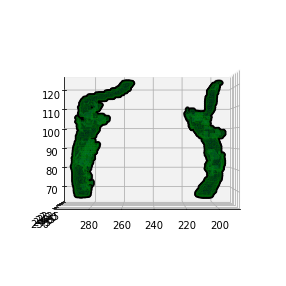

58.ca.seg.nrrd


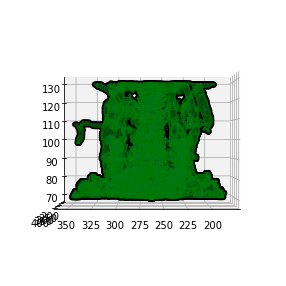

62.ca.seg.nrrd


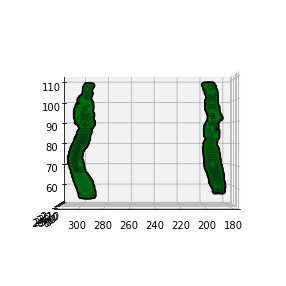

63.ca.seg.nrrd


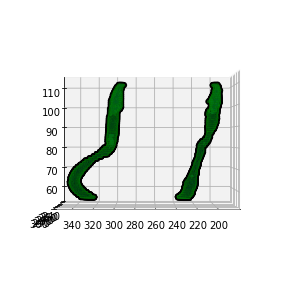

59.ca.seg.nrrd


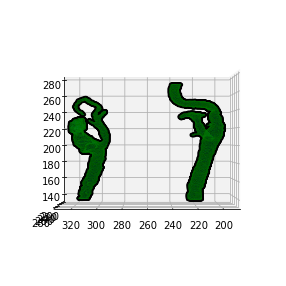

75.ca.seg.nrrd


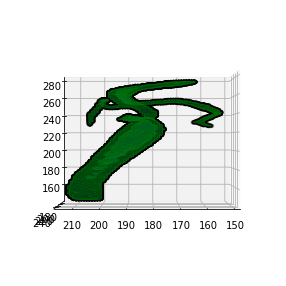

83.ca.seg.nrrd


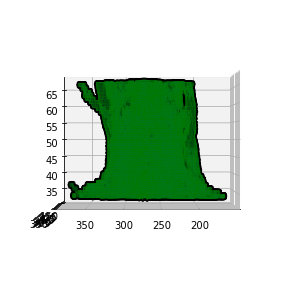

26.ca.seg.nrrd


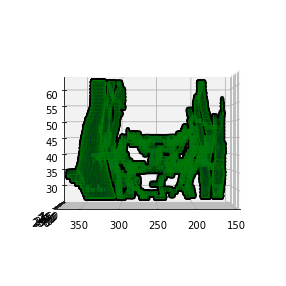

79.ca.seg.nrrd


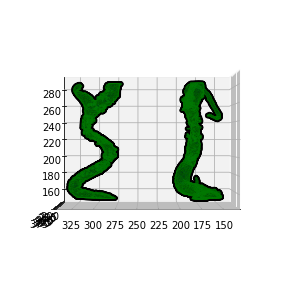

31.ca.seg.nrrd


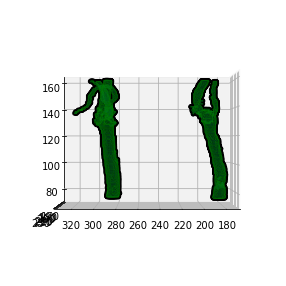

27.ca.seg.nrrd


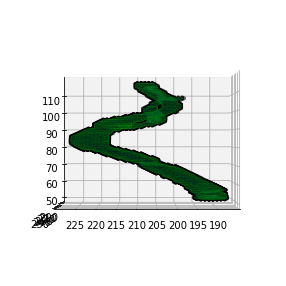

32.ca.seg.nrrd


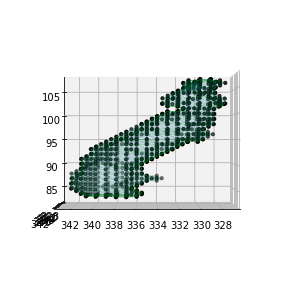

In [5]:
for i in range(len(seg)):
    d = DATAPATH + seg[i]
    data, header = nrrd.read(d)
    
    min_val, max_val = data.min(), data.max()
    isovalue = (min_val + max_val) / 2 
    
    if isovalue != 0:
        vertices, faces, normals, values = measure.marching_cubes(data, isovalue)
        print(seg[i])
        
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)

        mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
        ax.add_collection3d(mesh)
        
        ax.view_init(elev=0, azim=90)

        plt.show()